<a href="https://colab.research.google.com/github/dev-alexandremarcet/MVP_Analise_de_Dados/blob/main/MVP_An%C3%A1lise_de_Dados_Obesidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados - Alexandre Peixoto Marcet**


# 1 - Definição do Problema

A obesidade, que causa problemas físicos e mentais, é um problema de saúde global com graves consequências. A prevalência da obesidade está aumentando constantemente e, portanto, são necessárias novas pesquisas que examinem os fatores que influenciam a obesidade e como prever a ocorrência da doença de acordo com esses fatores. E como forma de contribuir para a divulgação e melhor compreensão desse problema, além da investigação e divulgação de soluções, decidi abordar esse tema no meu MVP de Análise de Dados.


Este MVP tem como objetivo coletar, analisar e tratar os dados sobre os níveis de obesidade de um conjunto de pessoas dos seguintes países: México, Peru e Colômbia, com idades entre 14 e 61 anos e diversos hábitos alimentares e condições físicas. E, a partir desses processos, gerar uma base de dados para ser utilizada na resolução dos seguintes problemas de agregação (clusterização) com aprendizado não supervisionado:

*   Segmentação de grupos de pessoas em diferentes níveis de peso
*   Analisar a relação entre os hábitos alimentares e a obesidade
*   Analisar a relação entre as condições físicas e a obesidade

Os dados foram obtidos na plataforma kaggle no seguinte endereço: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data

O dataset possui os seguintes atributos:


[0] - genero - gênero da pessoa

[1] - idade - idade da pessoa

[2] - altura - altura da pessoa (em metros)

[3] - peso - peso da pessoa (em kg)

[4] - hist_familiar_sobrepeso - existência (ou não) de histórico familiar de sobrepeso

[5] - alimentos_caloricos - ingestão (ou não) de alimentos com alto teor calórico com frequência

[6] - num_veg_refeicoes - quantidade de vegetais consumidos nas refeições

[7] - num_refeicoes_dia - número de refeições principais diárias

[8] - alim_entre_refeicoes - ingestão de alimentos entre as refeições principais

[9] - fumante - fumante ou não fumante

[10] - qtde_agua_dia - quantidade de água ingerida diariamente

[11] - verif_calorias_dia - se a pessoa monitora a quantidade de calorias ingeridas por dia

[12] - ativ_fisica_semana - número de vezes que a pessoa realiza atividades físicas por semana

[13] - tempo_disp_tech - tempo diário dedicado ao uso de dispositivos tecnológicos (tv, celular, computador)

[14] - alcool - frequência com que a pessoa ingere álcool

[15] - meio_transporte - meio de transporte usado com frequência

[16] - nivel_obesidade - nível de obesidade da pessoa

*   abaixo do peso
*   peso normal
*   sobrepeso
*   obesidade nível 1
*   obesidade nível 2
*   obesidade nível 3



# 2 - Análise pré-exploratória de dados

# 2.1 - Análise de dados

# 2.1.1 - Importação dos pacotes

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np

# Importação de pacotes que serãao utilizados na Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Importação dos pacotes que serão utilizados no Pré-processamento de Dados

# from sklearn.impute import SimpleImputer # tratamento de dados faltantes

import missingno as ms # para tratamento de missings

from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# 2.1.2 - Carga de dados do dataset dos níveis de obesidade

In [2]:
# Informa a URL de importação do dataset
url_dados = "https://raw.githubusercontent.com/dev-alexandremarcet/MVP_Analise_de_Dados/90d7f804eb760ca5e7454f8beb7b56320d3b2ad0/ObesityDataSet.csv"

# labels dos atributos do dataframe df_filmes
labels_atributos = ['genero', 'idade', 'altura', 'peso', 'hist_familiar_sobrepeso', 'alimentos_caloricos', 'num_vegetais_ref',
                    'num_refeicoes_dia', 'alim_entre_refeicoes', 'fumante', 'qtde_agua_dia', 'verif_calorias_dia',
                    'ativ_fisica_semana', 'tempo_disp_tech', 'alcool', 'meio_transporte', 'nivel_obesidade']

# carga do dataframe df_obesidade com os dados da url_dados
df_obesidade = pd.read_csv(url_dados, delimiter=',', header = 0, names = labels_atributos)

# 2.1.3 - Exibição das 10 primeiras linhas do dataset

In [3]:
df_obesidade.head(10)

,genero,idade,altura,peso,hist_familiar_sobrepeso,alimentos_caloricos,num_vegetais_ref,num_refeicoes_dia,alim_entre_refeicoes,fumante,qtde_agua_dia,verif_calorias_dia,ativ_fisica_semana,tempo_disp_tech,alcool,meio_transporte,nivel_obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


# 2.1.4 - Verificando informações sobre os atributos do dataset

In [4]:
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   genero                   2111 non-null   object 
 1   idade                    2111 non-null   float64
 2   altura                   2111 non-null   float64
 3   peso                     2111 non-null   float64
 4   hist_familiar_sobrepeso  2111 non-null   object 
 5   alimentos_caloricos      2111 non-null   object 
 6   num_vegetais_ref         2111 non-null   float64
 7   num_refeicoes_dia        2111 non-null   float64
 8   alim_entre_refeicoes     2111 non-null   object 
 9   fumante                  2111 non-null   object 
 10  qtde_agua_dia            2111 non-null   float64
 11  verif_calorias_dia       2111 non-null   object 
 12  ativ_fisica_semana       2111 non-null   float64
 13  tempo_disp_tech          2111 non-null   float64
 14  alcool                  

## Obs.: Os atributos categóricos e numéricos serão tratados devidamente na etapa de pré-processamento de dados

# 2.1.5 - Fazendo um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)

In [5]:
df_obesidade.describe()

,idade,altura,peso,num_vegetais_ref,num_refeicoes_dia,qtde_agua_dia,ativ_fisica_semana,tempo_disp_tech
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Obs.: Entre os dados estatísticos sobressaem algumas informações, tais como: valor mínimo de 1 litro de água consumido diariamente, peso máximo de 173 kg, 1 refeição diária (valor mínimo do atributo) e valor máximo de 2h de uso de dispositivos tecnológicos (tv, celular, computador).

# 2.1.6 - Verificando a quantidade de linhas (instâncias) e colunas (aributos) do dataset

In [6]:
df_obesidade.shape

(2111, 17)

# 2.1.7 - Calculando a matriz de correlação de Pearson para os valores numéricos do dataset

In [7]:
df_obesidade.corr(method = 'pearson', numeric_only = True)

,idade,altura,peso,num_vegetais_ref,num_refeicoes_dia,qtde_agua_dia,ativ_fisica_semana,tempo_disp_tech
idade,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
altura,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
peso,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
num_vegetais_ref,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
num_refeicoes_dia,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
qtde_agua_dia,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
ativ_fisica_semana,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
tempo_disp_tech,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


# 2.1.8 - Verificando a existência de valores nulos no dataset

In [8]:
df_obesidade.isnull().sum()

,0
genero,0
idade,0
altura,0
peso,0
hist_familiar_sobrepeso,0
alimentos_caloricos,0
num_vegetais_ref,0
num_refeicoes_dia,0
alim_entre_refeicoes,0
fumante,0


## Obs.: Conforme foi verificado, não existem valores nulos no dataset.

# 2.1.9 - Verificando a existência de linhas (instâncias) duplicadas no dataset

In [9]:
df_obesidade.duplicated().sum()

24

# 2.2 - Visualizações

# 2.2.1 - Visualizações Unimodais

# 2.2.1.1 - Visualização Individual de Histogramas das Colunas

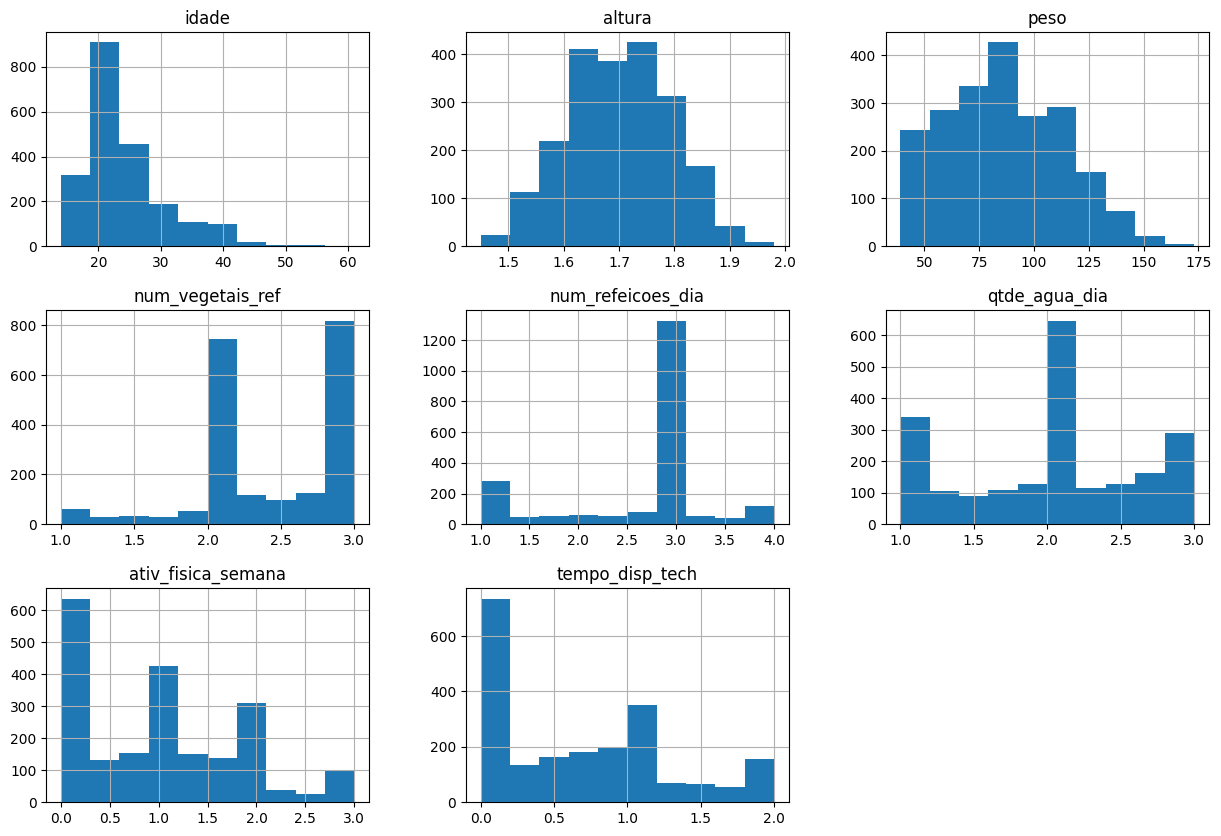

In [10]:
# Histograma
df_obesidade.hist(figsize = (15,10))
plt.show()

Na análise desses histogramas pode ser verificado que:

*   Os dados da coluna 'altura' apresentam uma distribuição normal
*   Os dados da coluna 'peso' possuem uma distribuição com leve assimetria à esquerda
*   Os dados da coluna 'idade' possui uma distribuição assimetrica à esquerda
*   Os dados das demais colunas possuem uma distribuição modal e bimodal ('num_vegetais_ref')


# 2.2.1.2 - Visualização Individual de Gráficos de Densidade das Colunas

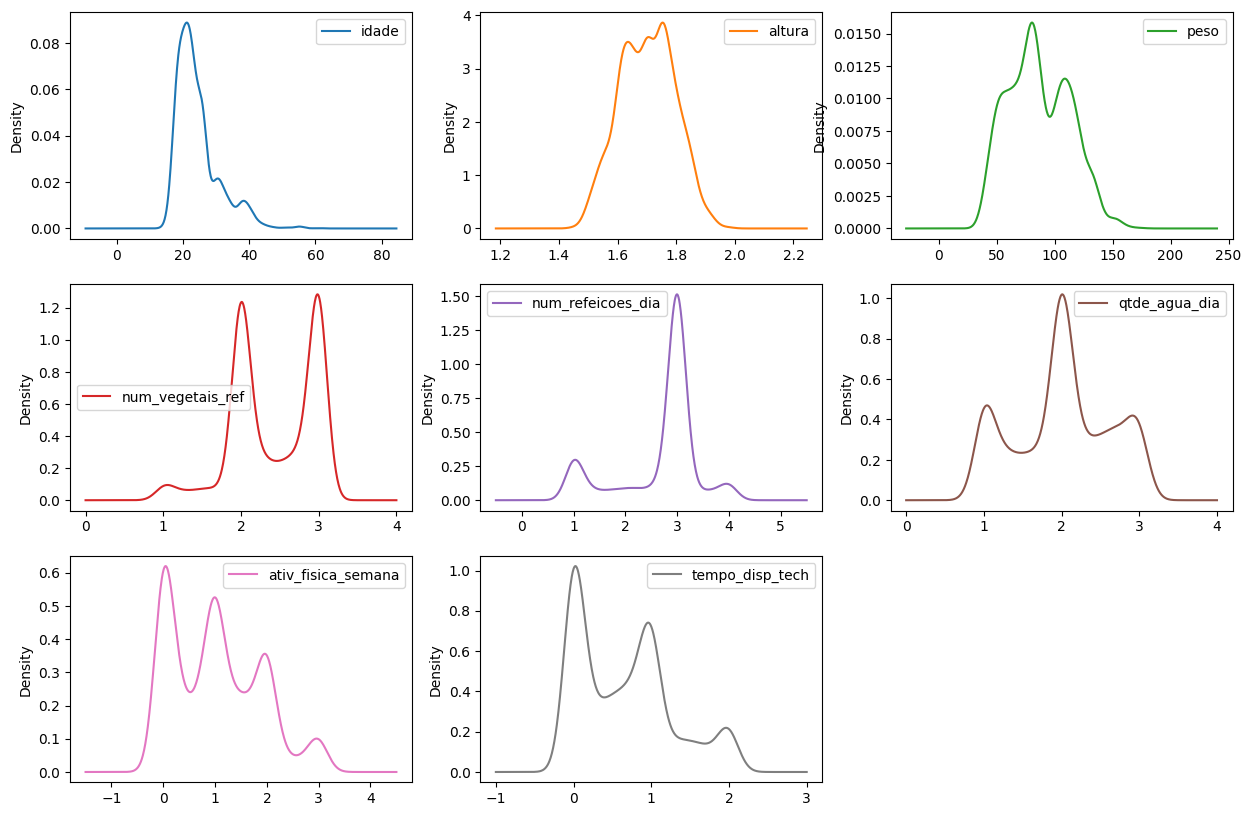

In [11]:
# Density Plot
df_obesidade.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Na análise dos gráficos de densidade pode ser verificado que:

*   Os dados da coluna 'altura' apresentam uma distribuição normal
*   Os dados da coluna 'peso' possuem uma distribuição com leve assimetria à esquerda
*   Os dados da coluna 'idade' possui uma distribuição assimetrica à esquerda
*   Os dados das demais colunas possuem uma distribuição modal e bimodal ('num_vegetais_ref')

# 2.2.1.3 - Visualização Individual de Boxplots das Colunas

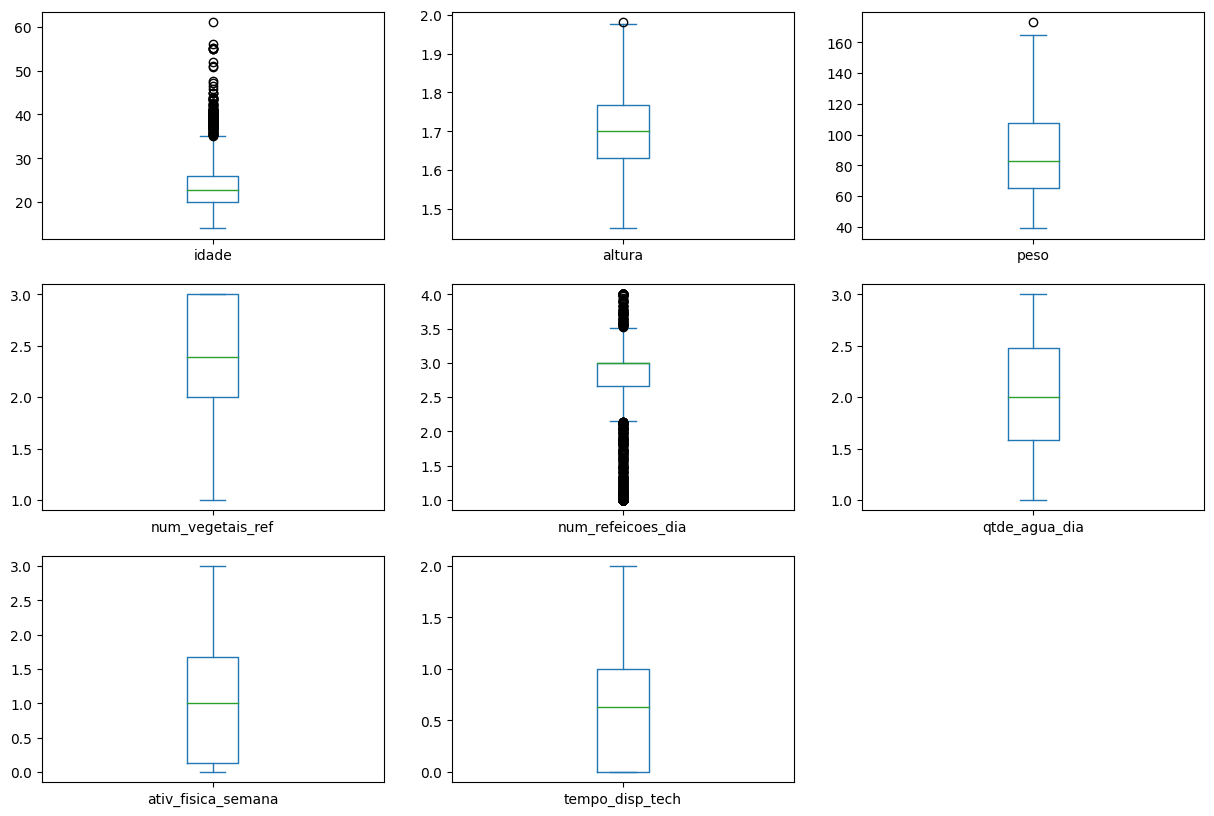

In [12]:
# Boxplot
df_obesidade.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Na análise dos boxplots pode ser verificado que:

*   As colunas 'idade' e 'num_refeicoes_dia' possuem muitos outliers
*   As colunas 'altura' e 'peso' possuem poucos outliers
*   As demais colunas não possuem outliers

# 2.2.2 - Visualizações Multimodais

# 2.2.2.1 - Visualização da Matriz de Correlação usando Seaborn

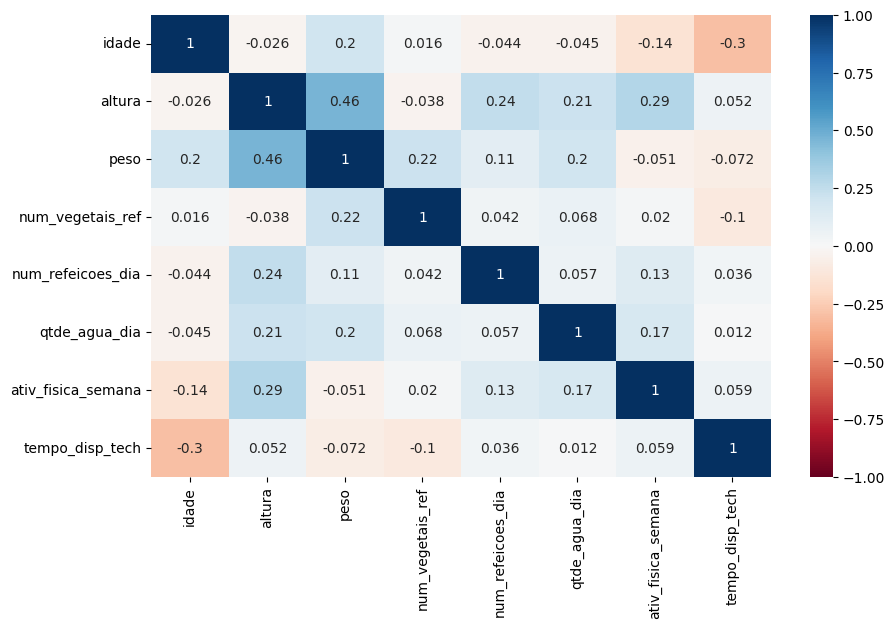

In [13]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(df_obesidade.corr(numeric_only = True), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Na análise da matriz de correlação pode ser verificado que existem correlações negativas entre determinadas variáveis. Porém, essas correlações negativas são fracas. Sendo a mais forte entre 'idade' e 'tempo_disp_tech' com -0,3. Por outro lado, existem várias correlações positivas. Sendo algumas delas mais fortes do que as negativas e a mais alta entre 'altura' e 'peso', com +0,46.

# 2.2.2.2 - Visualização do Scatter Plot do dataset

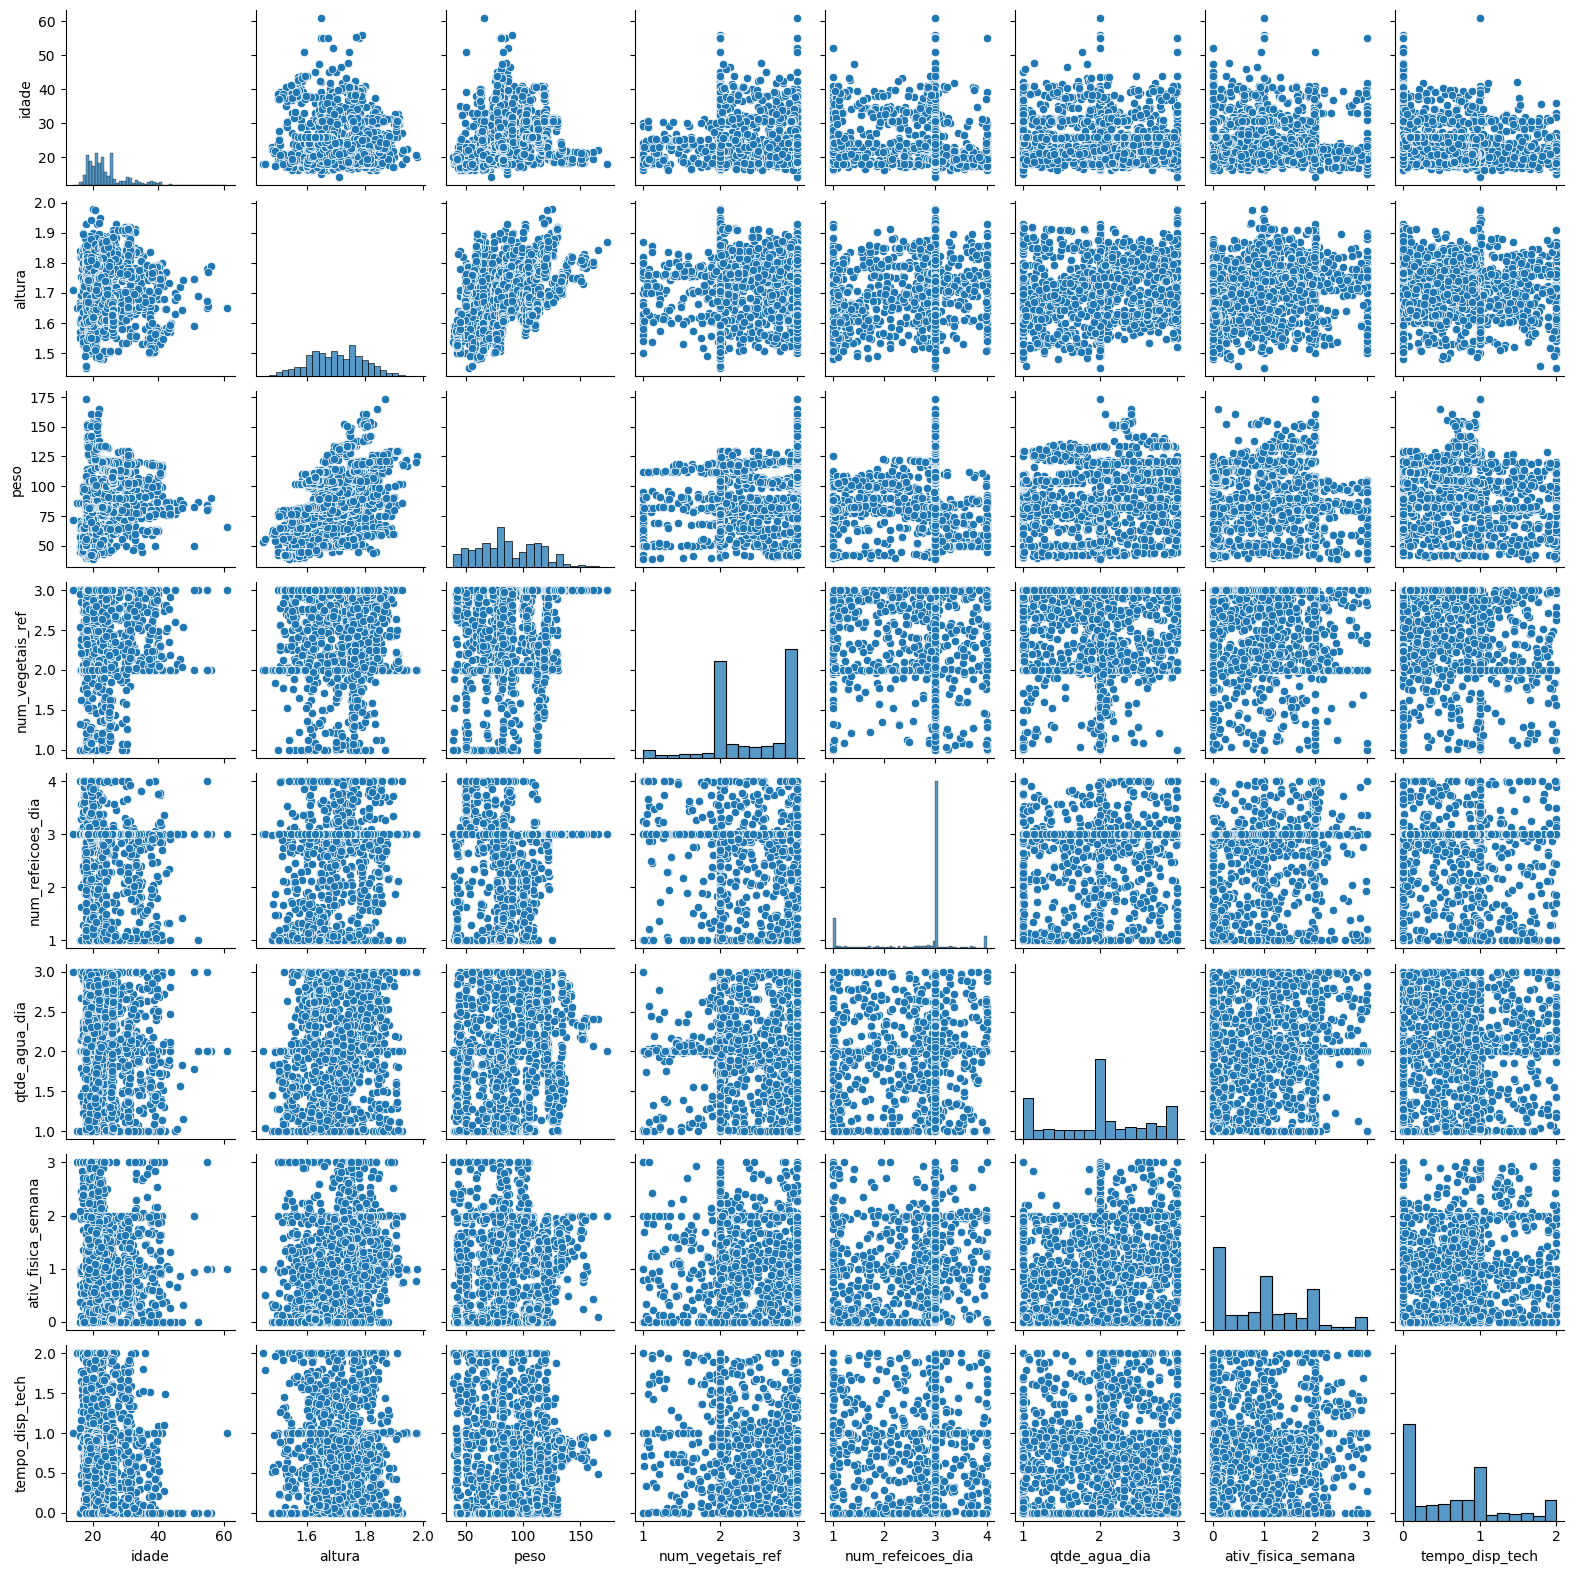

In [14]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df_obesidade, height = 2.0)

Na análise dos gráficos de dispersão pode ser verificado que:

*   possuem uma correlação positiva moderada:'peso' e 'altura'
*   possuem uma correlação negativa fraca:'idade' e 'peso'; 'idade' e 'altura'


Os demais gráficos estão com muitos valores bem dispersos.

# 3 - Pré-processamento de Dados

# 3.1 - Tratamento de Missings e Eliminação de Duplicadas

#3.1.0 - Eliminando duplicadas

In [15]:
# Eliminando as linhas duplicadas
df_obesidade.drop_duplicates(inplace = True)

#3.1.1 - Verifcando as novas dimensões do dataset e as 10 primeiras linhas

In [16]:
df_obesidade.shape

(2087, 17)

In [17]:
df_obesidade.head(10)

,genero,idade,altura,peso,hist_familiar_sobrepeso,alimentos_caloricos,num_vegetais_ref,num_refeicoes_dia,alim_entre_refeicoes,fumante,qtde_agua_dia,verif_calorias_dia,ativ_fisica_semana,tempo_disp_tech,alcool,meio_transporte,nivel_obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


# 3.1.2 - Criando um novo dataset para o tratamento de missings

<Axes: >

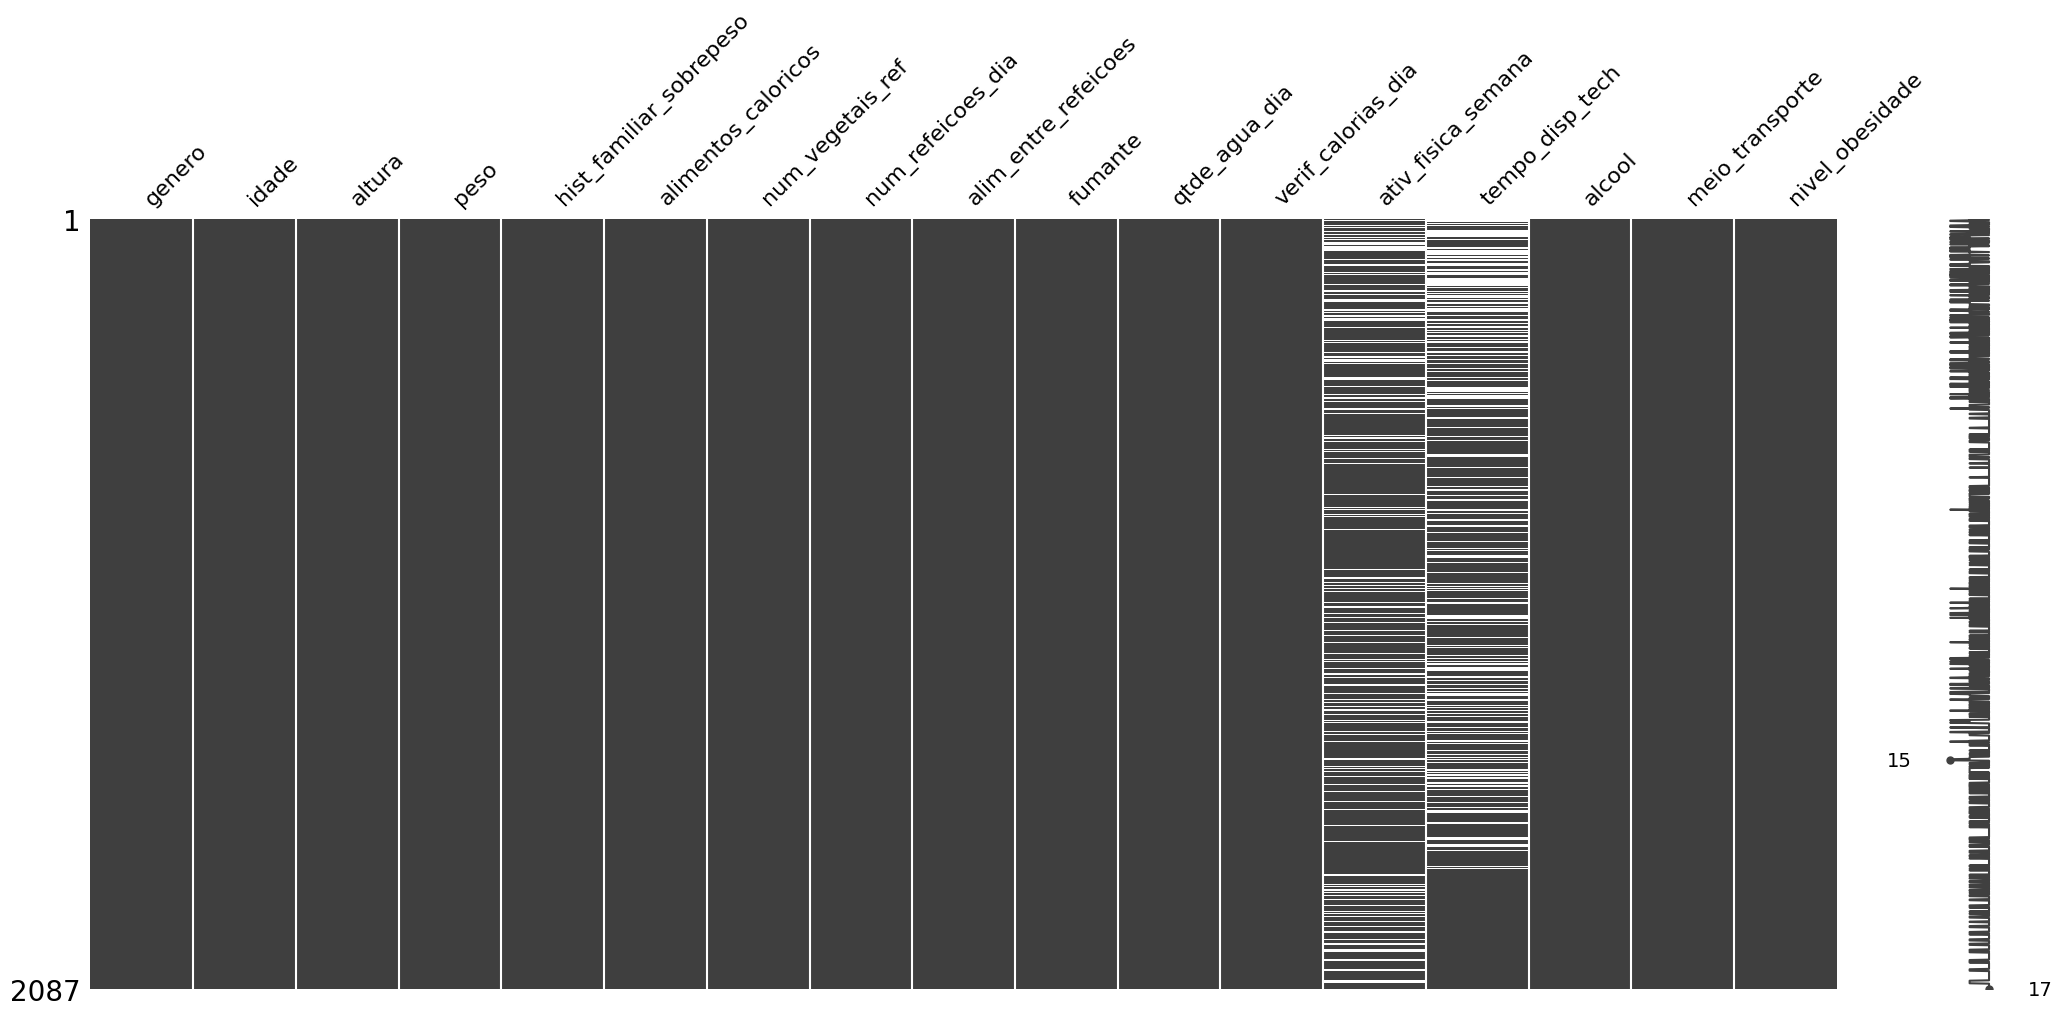

In [18]:
# recuperando os nomes das colunas
atributos = list(df_obesidade.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_SemMissings = df_obesidade[atributos[:]]

# substituindo os zeros por NaN
df_SemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_SemMissings)

##Obs.: A verificação através do gráfico de valores nulos, que foram substituídos por 'NaN' indica normalidade. Isto porque o valor 0(zero) nas colunas de número de atividades físicas por semana ('ativ_fisica_semana') e tempo de uso de dispositivos tecnológicos pode ser considerado normal em algumas situações e circunstâncias. Indica que alguém que não faz atividade física e/ou alguém que não usa dispositivos tecnológicos.

# 3.1.3 - Verificando a existência de nulls no dataset recém-criado df_SemMissings

In [19]:
# verificando novamente nulls no df_SemMissings
df_SemMissings.isnull().sum()

,0
genero,0
idade,0
altura,0
peso,0
hist_familiar_sobrepeso,0
alimentos_caloricos,0
num_vegetais_ref,0
num_refeicoes_dia,0
alim_entre_refeicoes,0
fumante,0


# 3.1.4 - Retornando com os valores originais

<Axes: >

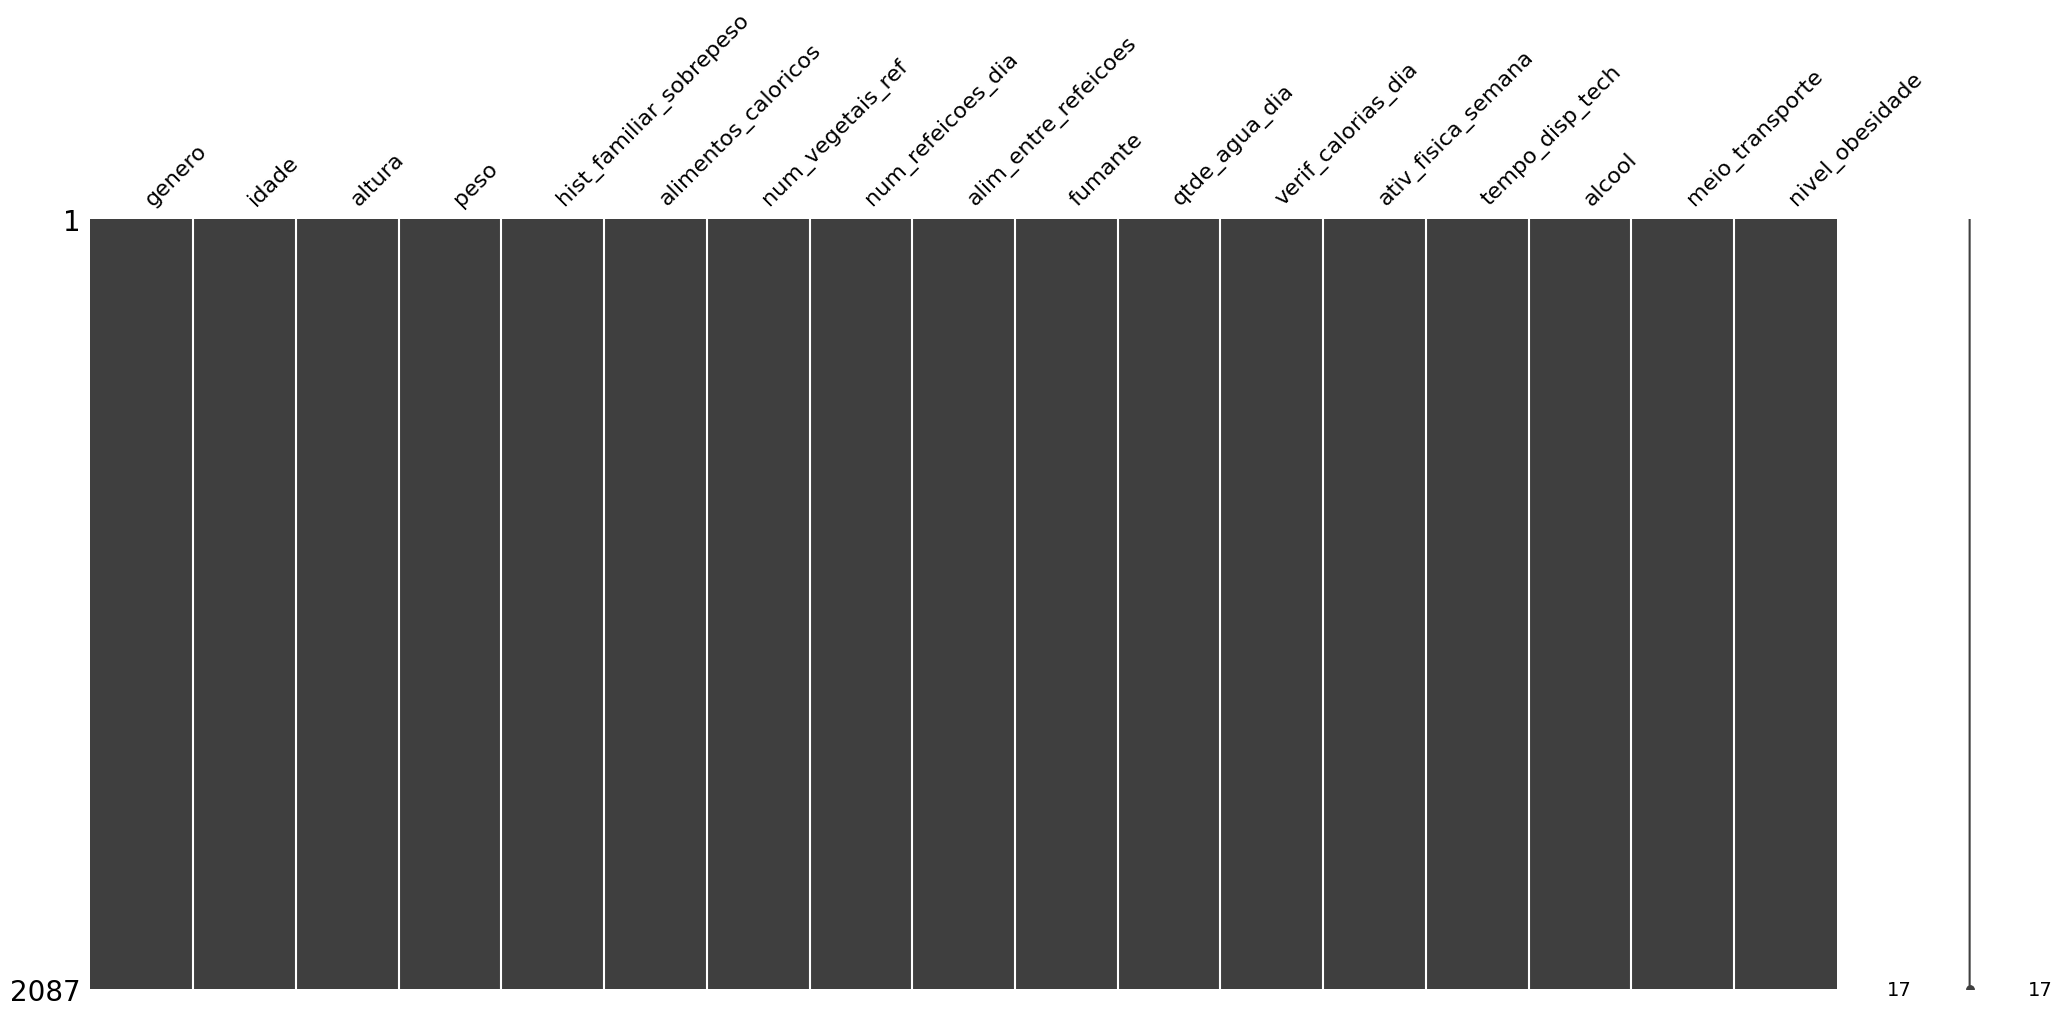

In [20]:
# substituindo os NaN de 'ativ_fisica_semana' e 'tempo_disp_tech' por 0 - voltando aos valores originais destas colunas
df_SemMissings['ativ_fisica_semana'].fillna(0, inplace=True)
df_SemMissings['tempo_disp_tech'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_SemMissings)

# 3.1.5 - Verificando nulls no dataset df_SemMissings

In [21]:
# verificando nulls no dataset tratado
df_SemMissings.isnull().sum()

,0
genero,0
idade,0
altura,0
peso,0
hist_familiar_sobrepeso,0
alimentos_caloricos,0
num_vegetais_ref,0
num_refeicoes_dia,0
alim_entre_refeicoes,0
fumante,0


##Obs.: Confirmando a normalidade dos zeros encontrados nos atributos 'ativ_fisica_semana' e 'tempo_disp_tech', conforme mencionado na observação anterior deste tópico de tratamento de missings.

# 3.2 - Transformações

# 3.2.1 - Verificando as informações dos atributos do dataset

In [22]:
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   genero                   2087 non-null   object 
 1   idade                    2087 non-null   float64
 2   altura                   2087 non-null   float64
 3   peso                     2087 non-null   float64
 4   hist_familiar_sobrepeso  2087 non-null   object 
 5   alimentos_caloricos      2087 non-null   object 
 6   num_vegetais_ref         2087 non-null   float64
 7   num_refeicoes_dia        2087 non-null   float64
 8   alim_entre_refeicoes     2087 non-null   object 
 9   fumante                  2087 non-null   object 
 10  qtde_agua_dia            2087 non-null   float64
 11  verif_calorias_dia       2087 non-null   object 
 12  ativ_fisica_semana       2087 non-null   float64
 13  tempo_disp_tech          2087 non-null   float64
 14  alcool                   2087

## Obs.: Os atributos 'genero', 'hist_familiar_sobrepeso', 'alimentos_caloricos', 'alim_entre_refeicoes', 'fumante', 'verif_calorias_dia','alcool', 'meio_transporte' e 'nivel_obesidade' são categóricos. Portanto, serão transformados para dados numéricos usando o LabelEncoder por causa da dimensionalidade do dataset, que já possui 17 atributos.

# 3.2.2 - Tratamento de outliers

In [23]:
# verificando os dados do atributo 'idade'
df_obesidade.groupby('idade').size()

,0
idade,
14.000000,1
15.000000,1
16.000000,8
16.093234,1
16.129279,1
...,...
55.022494,1
55.137881,1
55.246250,1


##Obs.: Os resultados dessa análise são normais.

In [24]:
# Analisando os dados do atributo 'altura'
df_obesidade.groupby('altura').size()

,0
altura,
1.450000,1
1.456346,1
1.480000,1
1.481682,1
1.483284,1
...,...
1.931263,1
1.942725,1
1.947406,1


##Obs.: Os resultados dessa análise são normais.

In [25]:
# Analisando os dados do atributo 'peso'
df_obesidade.groupby('peso').size()

,0
peso,
39.000000,1
39.101805,1
39.371523,1
39.695295,1
39.850137,1
...,...
155.872093,1
160.639405,1
160.935351,1


##Obs.: Analisando os dados do atributo 'peso' podemos concluir que uma pessoa pode pesar 173 kg em determinadas circunstâncias.

In [26]:
df_obesidade.groupby('num_refeicoes_dia').size()

,0
num_refeicoes_dia,
1.000000,179
1.000283,1
1.000414,1
1.000610,1
1.001383,1
...,...
3.995957,1
3.998618,1
3.998766,1


##Obs.: Analisando os dados do atributo 'num_refeicoes_dia' verificamos que os valores mínimo e máximo podem ser considerados normais em determinadas ciscunstâncias. Alguém pode fazer apenas 1 refeição principal por dia. Enquanto que outra pessoa pode fazer 4 refeições principais por dia.

# 3.2.3 - Analisando os dados categóricos

## Obs.: Os dados categóricos serão analisados para verificar a existência de valores inconsistentes.

# 3.2.3.4 - Analisando os valores das instâncias do atributo 'genero'

In [27]:
# Analisando os dados do atributo 'genero'
df_obesidade.groupby('genero').size()

,0
genero,
Female,1035
Male,1052


##Obs.: Resultado normal sem inconsistências

# 3.2.3.5 - Analisando os valores das instâncias do atributo 'hist_familiar_sobrepeso'

In [28]:
# Analisando os dados do atributo 'hist_familiar_sobrepeso'
df_obesidade.groupby('hist_familiar_sobrepeso').size()

,0
hist_familiar_sobrepeso,
no,365
yes,1722


##Obs.: Resultado normal sem inconsistências

# 3.2.3.6 - Analisando os valores das instâncias do atributo 'alimentos_caloricos'

In [29]:
# Analisando os dados do atributo 'alimentos_caloricos'
df_obesidade.groupby('alimentos_caloricos').size()

,0
alimentos_caloricos,
no,243
yes,1844


##Obs.: Resultado normal sem inconsistências

# 3.2.3.7 - Analisando os valores das instâncias do atributo 'alim_entre_refeicoes'

In [30]:
# Analisando os dados do atributo 'alim_entre_refeicoes'
df_obesidade.groupby('alim_entre_refeicoes').size()

,0
alim_entre_refeicoes,
Always,53
Frequently,236
Sometimes,1761
no,37


##Obs.: Resultado normal sem inconsistências

# 3.2.3.8 - Analisando os valores das instâncias do atributo 'fumante'

In [31]:
# Analisando os dados do atributo 'fumante'
df_obesidade.groupby('fumante').size()

,0
fumante,
no,2043
yes,44


##Obs.: Resultado normal sem inconsistências

# 3.2.3.9 - Analisando os valores das instâncias do atributo 'verif_calorias_dia'

In [32]:
# Analisando os dados do atributo 'verif_calorias_dia'
df_obesidade.groupby('verif_calorias_dia').size()

,0
verif_calorias_dia,
no,1991
yes,96


##Obs.: Resultado normal sem inconsistências

# 3.2.3.10 - Analisando os valores das instâncias do atributo 'alcool'

In [33]:
# Analisando os dados do atributo 'alcool'
df_obesidade.groupby('alcool').size()

,0
alcool,
Always,1
Frequently,70
Sometimes,1380
no,636


##Obs.: Resultado normal sem inconsistências

# 3.2.3.11 - Analisando os valores das instâncias do atributo 'meio_transporte'

In [34]:
# Analisando os dados do atributo 'meio_transporte'
df_obesidade.groupby('meio_transporte').size()

,0
meio_transporte,
Automobile,456
Bike,7
Motorbike,11
Public_Transportation,1558
Walking,55


##Obs.: Resultado normal sem inconsistências

# 3.2.3.12 - Analisando os valores das instâncias do atributo 'nivel_obesidade'

In [35]:
# Analisando os dados do atributo 'nivel_obesidade'
df_obesidade.groupby('nivel_obesidade').size()

,0
nivel_obesidade,
Insufficient_Weight,267
Normal_Weight,282
Obesity_Type_I,351
Obesity_Type_II,297
Obesity_Type_III,324
Overweight_Level_I,276
Overweight_Level_II,290


##Obs.: Resultado normal sem inconsistências

## Obs.: Não foram encontradas inconsistências nas análises dos valores dos atributos categóricos.

# 3.2.4 - Transformação de Dados Categóricos em Dados Numéricos

In [36]:
# instanciando o LabelEncoder
label_encoder = LabelEncoder()

# transformando os dados categóricos em dados numéricos
df_obesidade['genero'] = label_encoder.fit_transform(df_obesidade['genero'])
df_obesidade['hist_familiar_sobrepeso'] = label_encoder.fit_transform(df_obesidade['hist_familiar_sobrepeso'])
df_obesidade['alimentos_caloricos'] = label_encoder.fit_transform(df_obesidade['alimentos_caloricos'])
df_obesidade['alim_entre_refeicoes'] = label_encoder.fit_transform(df_obesidade['alim_entre_refeicoes'])
df_obesidade['fumante'] = label_encoder.fit_transform(df_obesidade['fumante'])
df_obesidade['verif_calorias_dia'] = label_encoder.fit_transform(df_obesidade['verif_calorias_dia'])
df_obesidade['alcool'] = label_encoder.fit_transform(df_obesidade['alcool'])
df_obesidade['meio_transporte'] = label_encoder.fit_transform(df_obesidade['meio_transporte'])
df_obesidade['nivel_obesidade'] = label_encoder.fit_transform(df_obesidade['nivel_obesidade'])

# 3.2.5 - Exibição das 10 primeiras linhas do dataset após as transformações nos dados categóricos

In [37]:
df_obesidade.head(10)

,genero,idade,altura,peso,hist_familiar_sobrepeso,alimentos_caloricos,num_vegetais_ref,num_refeicoes_dia,alim_entre_refeicoes,fumante,qtde_agua_dia,verif_calorias_dia,ativ_fisica_semana,tempo_disp_tech,alcool,meio_transporte,nivel_obesidade
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


##Obs.: As transformações foram realizadas com sucesso

# 3.3 - Transformações Numéricas

# 3.3.1 - Normalização

In [38]:
# Normalizando os dados
dados_normalizados_obesidade = MinMaxScaler().fit_transform(df_obesidade)

# Exibindo os dados normalizados em comparação com os dados originais
print("Dados Originais: \n\n", df_obesidade.values)
print("\nDados Normalizados: \n\n", dados_normalizados_obesidade)

Dados Originais: 

 [[ 0.       21.        1.62     ...  3.        3.        1.      ]
 [ 0.       21.        1.52     ...  2.        3.        1.      ]
 [ 1.       23.        1.8      ...  1.        3.        1.      ]
 ...
 [ 0.       22.524036  1.752206 ...  2.        3.        4.      ]
 [ 0.       24.361936  1.73945  ...  2.        3.        4.      ]
 [ 0.       23.664709  1.738836 ...  2.        3.        4.      ]]

Dados Normalizados: 

 [[0.         0.14893617 0.32075472 ... 1.         0.75       0.16666667]
 [0.         0.14893617 0.13207547 ... 0.66666667 0.75       0.16666667]
 [1.         0.19148936 0.66037736 ... 0.33333333 0.75       0.16666667]
 ...
 [0.         0.18136247 0.5702     ... 0.66666667 0.75       0.66666667]
 [0.         0.22046672 0.54613208 ... 0.66666667 0.75       0.66666667]
 [0.         0.20563211 0.54497358 ... 0.66666667 0.75       0.66666667]]


#3.3.2 - Padronização

In [39]:
# Padronizando os dados
dados_padronizados_obesidade = StandardScaler().fit_transform(df_obesidade)

# Exibindo os dados padronizados em comparação com os dados originais
print("Dados Originais: \n\n", df_obesidade.values)
print("\nDados Padronizados: \n\n", dados_padronizados_obesidade)

Dados Originais: 

 [[ 0.       21.        1.62     ...  3.        3.        1.      ]
 [ 0.       21.        1.52     ...  2.        3.        1.      ]
 [ 1.       23.        1.8      ...  1.        3.        1.      ]
 ...
 [ 0.       22.524036  1.752206 ...  2.        3.        4.      ]
 [ 0.       24.361936  1.73945  ...  2.        3.        4.      ]
 [ 0.       23.664709  1.738836 ...  2.        3.        4.      ]]

Dados Padronizados: 

 [[-1.00817911e+00 -5.26612965e-01 -8.87407845e-01 ...  1.41183596e+00
   5.06767941e-01 -1.03407185e+00]
 [-1.00817911e+00 -5.26612965e-01 -1.96078827e+00 ... -5.22833538e-01
   5.06767941e-01 -1.03407185e+00]
 [ 9.91887244e-01 -2.12506874e-01  1.04467692e+00 ... -2.45750303e+00
   5.06767941e-01 -1.03407185e+00]
 ...
 [-1.00817911e+00 -2.87258470e-01  5.31665481e-01 ... -5.22833538e-01
   5.06767941e-01  5.05967126e-01]
 [-1.00817911e+00  1.38932307e-03  3.94745074e-01 ... -5.22833538e-01
   5.06767941e-01  5.05967126e-01]
 [-1.00817911e+00 